In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
from scipy.signal import argrelextrema
from scipy.interpolate import UnivariateSpline
from statsmodels.nonparametric.smoothers_lowess import lowess

(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)
(913, 1217, 3)


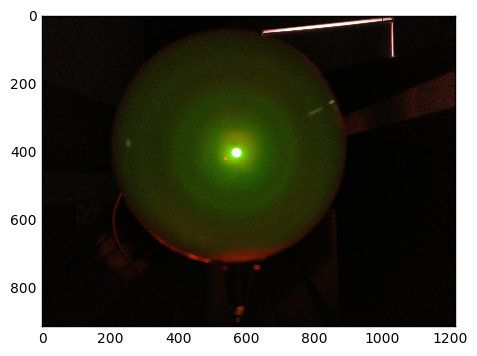

In [131]:
num_names_list = range(20, 52,2)
names_list = []
for i in num_names_list:
    names_list.append(str(i))

pics_list=[]
for s in names_list:
    img=mpimg.imread('exp_pics/'+s+'.jpg')
    pics_list.append(img)
    print np.shape(img)
    
plt.imshow(pics_list[0][:, :, :])
#plt.imshow(pics_list[15][:, :, 1])

[  22   55   87  100  134  173  294  334  411  574  725  827  926  939  946
  976 1022 1055 1085 1123 1164 1177]


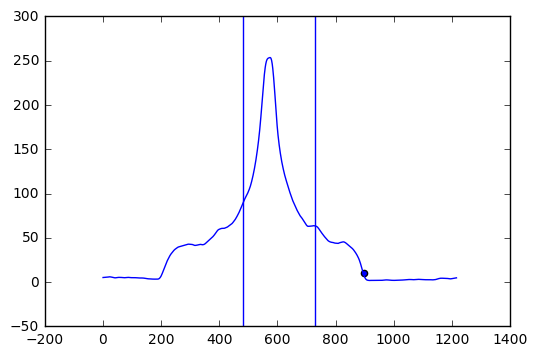

In [144]:
px_coords=np.arange(0, 1217)
init_px=207 #posicion arreglo
final_px=899
dist_px = final_px-init_px
def px_to_cm(d_px):
    global dist_px
    return d_px * 8.55/dist_px
#plt.plot(pics_list[3][400, :,1])
spline = UnivariateSpline(px_coords,pics_list[0][400, :,1] )
#plt.plot(px_coords, spline(px_coords))
plt.scatter(899, 10)
'''
for k in range(len(argrelextrema(spline(px_coords), np.greater)[0])):
    for j in range(k, len(argrelextrema(spline(px_coords), np.greater)[0])):
        one = argrelextrema(spline(px_coords), np.greater)[0][k]
        print one
        two = argrelextrema(spline(px_coords), np.greater)[0][j]
        if(abs(spline(px_coords)[one]-spline(px_coords)[two])<3):
            print one,two
argrelextrema(spline(px_coords), np.greater)
'''

filtered = lowess(pics_list[0][400, :,1], px_coords, is_sorted=True, frac=0.025, it=0)
plt.plot(filtered[:,0], filtered[:,1])
plt.axvline(481)
plt.axvline(730)
print argrelextrema(filtered[:,1], np.greater)[0]

In [145]:

D1 = np.array([px_to_cm(abs(411-725)),px_to_cm(abs(419-725)), px_to_cm(abs(418-724)),\
            px_to_cm(abs(430-723)), px_to_cm(abs(444-706)), px_to_cm(abs(440-710)),\
             px_to_cm(abs(453-698)),px_to_cm(abs(459-692)), px_to_cm(abs(457-694)),\
             px_to_cm(abs(465-687)), px_to_cm(abs(463-685)), px_to_cm(abs(471-683)),\
             px_to_cm(abs(476-682)), px_to_cm(abs(477-681)), px_to_cm(abs(478-681)), \
             px_to_cm(abs(481-680)) ])
D2 = np.array([px_to_cm(abs(827-334)),px_to_cm(abs(312-825)), px_to_cm(abs(314-813)), \
              px_to_cm(abs(323-809)), px_to_cm(abs(333-800)), px_to_cm(abs(345-796)),\
              px_to_cm(abs(355-789)), px_to_cm(abs(363-782)), px_to_cm(abs(371-776)), \
              px_to_cm(abs(375-775)), px_to_cm(abs(383-768)), px_to_cm(abs(384-764)), \
              px_to_cm(abs(393-760)), px_to_cm(abs(395-757)), px_to_cm(abs(398-756)), \
              px_to_cm(abs(403-753))])
Volt = 1e3*np.arange(2., 5.2, 0.2)
print Volt

[ 2000.  2200.  2400.  2600.  2800.  3000.  3200.  3400.  3600.  3800.
  4000.  4200.  4400.  4600.  4800.  5000.]


In [146]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress([(1./np.sqrt(Volt))[-1], (1./np.sqrt(Volt))[0]], [px_to_cm(70-13),px_to_cm(54-21) ][::-1])
D2_errors =  0.5*(slope*(1./np.sqrt(Volt))+intercept)*1e-2
D2_x_errors = ((0.05*1e3)/abs(Volt))*abs(1./(np.sqrt(Volt)))
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress([(1./np.sqrt(Volt))[-1], (1./np.sqrt(Volt))[0]], [px_to_cm(99-75),px_to_cm(70-52)][::-1])
D1_errors =  0.5*(slope1*(1./np.sqrt(Volt))+intercept1)*1e-2


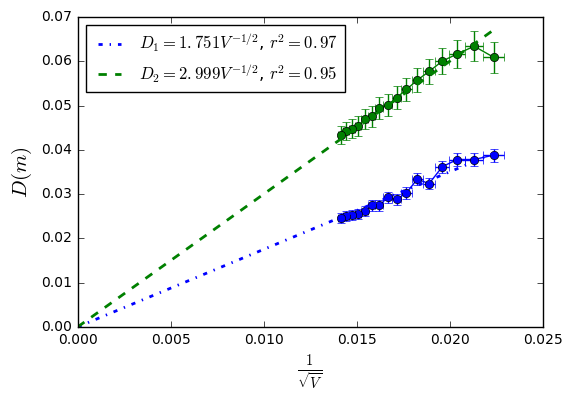

In [160]:
from scipy.optimize import curve_fit
plt.errorbar(1./np.sqrt(Volt), D1*1e-2, xerr=D2_x_errors, yerr = D1_errors, marker='o')
plt.errorbar(1./np.sqrt(Volt), D2*1e-2,xerr=D2_x_errors, yerr = D2_errors, marker='o')
def func(x, a):
    return a * x
x = np.linspace(0, 1./np.sqrt(2000), 100)
popt, pcov = curve_fit(func, 1./np.sqrt(Volt), D1*1e-2)
corr_d1 = np.corrcoef(D1, func(1./np.sqrt(Volt), *popt))[0,1]**2
perr = np.sqrt(np.diag(pcov))

plt.plot(x, func(x, *popt), label='$D_1=%.3f V^{-1/2}$, $r^2=%.2f$'%(popt[0],corr_d1),ls='-.', lw=2, c='b')
popt2, pcov2 = curve_fit(func, 1./np.sqrt(Volt), D2*1e-2)
corr_d2= np.corrcoef(D2, func(1./np.sqrt(Volt), *popt2))[0,1]**2
perr2 = np.sqrt(np.diag(pcov2))
plt.plot(x, func(x, *popt2), label='$D_2=%.3f V^{-1/2}$, $r^2=%.2f$'%(popt2[0], corr_d2), ls='--', lw=2, c='g')
plt.legend(loc=0, fontsize=12)
plt.xlabel('$\\frac{1}{\sqrt{V}}$', fontsize=15)
plt.ylabel('$D(m)$', fontsize=15)

plt.gcf()
plt.savefig('diam_lines.svg', dpi=300, transparency=True)

In [183]:
print '$V (\pm 0.05kV)$ & $D_1 (cm)$ & $D_2 (cm)$\\\\\\hline' 
for i in range(len(D1)):
    print Volt[i]*1e-3, ' & %.4f'%D1[i],'$\pm$ %.4f'%D1_errors[i], '& %.4f'%D2[i],'$\pm$ %.4f'%D1_errors[i], '\\\\'

$V (\pm 0.05kV)$ & $D_1 (cm)$ & $D_2 (cm)$\\\hline
2.0  & 3.8796 $\pm$ 0.0015 & 6.0913 $\pm$ 0.0015 \\
2.2  & 3.7808 $\pm$ 0.0014 & 6.3384 $\pm$ 0.0014 \\
2.4  & 3.7808 $\pm$ 0.0014 & 6.1654 $\pm$ 0.0014 \\
2.6  & 3.6202 $\pm$ 0.0014 & 6.0048 $\pm$ 0.0014 \\
2.8  & 3.2371 $\pm$ 0.0013 & 5.7700 $\pm$ 0.0013 \\
3.0  & 3.3360 $\pm$ 0.0013 & 5.5723 $\pm$ 0.0013 \\
3.2  & 3.0271 $\pm$ 0.0013 & 5.3623 $\pm$ 0.0013 \\
3.4  & 2.8788 $\pm$ 0.0012 & 5.1770 $\pm$ 0.0012 \\
3.6  & 2.9283 $\pm$ 0.0012 & 5.0040 $\pm$ 0.0012 \\
3.8  & 2.7429 $\pm$ 0.0012 & 4.9422 $\pm$ 0.0012 \\
4.0  & 2.7429 $\pm$ 0.0012 & 4.7569 $\pm$ 0.0012 \\
4.2  & 2.6194 $\pm$ 0.0012 & 4.6951 $\pm$ 0.0012 \\
4.4  & 2.5452 $\pm$ 0.0012 & 4.5345 $\pm$ 0.0012 \\
4.6  & 2.5205 $\pm$ 0.0011 & 4.4727 $\pm$ 0.0011 \\
4.8  & 2.5082 $\pm$ 0.0011 & 4.4233 $\pm$ 0.0011 \\
5.0  & 2.4587 $\pm$ 0.0011 & 4.3244 $\pm$ 0.0011 \\


$$\lambda_{dB} = \frac{h}{\sqrt{2eVm_e}}$$


$$\lambda_{Bragg} = \frac{2d\sin\theta}{n}, \ \ \lambda < 2d_i$$


$$\lambda_{Bragg} = \frac{2d}{n}\frac{D}{2L}$$

$$\frac{h}{\sqrt{2eVm_e}}=\frac{2d}{n}\frac{D}{2L}$$

$$D=\frac{nL}{d}\frac{h}{\sqrt{2eVm_e}}$$

$$D=\frac{hnL}{d\sqrt{2em_e}}\frac{1}{\sqrt{V}}$$

$$M=\frac{hnL}{d\sqrt{2em_e}}$$

$$d_n=\frac{hnL}{M\sqrt{2em_e}}$$

In [169]:
from scipy.constants import *
slope_constants= h*13.5e-2/np.sqrt(2*e*m_e)
print popt[0], popt2[0]
d1=slope_constants/popt[0]
d2=(2*slope_constants)/popt2[0]
d1_teo = 213e-12
d2_teo = 123e-12
slope_1_teo=h*1*13.5e-2/(d1_teo*np.sqrt(2*e*m_e))
slope_2_teo=h*2*13.5e-2/(d2_teo*np.sqrt(2*e*m_e))
print slope_1_teo, slope_2_teo
print d1*1e12, '+-',d1*1e12*perr[0]/popt[0] , 'pm'
print d2*1e12, '+-',d2*1e12*perr2[0]/popt2[0], 'pm'

1.75096189091 2.9987083446
0.777312228407 2.69215454717
94.5580286531 +- 0.783703697262 pm
110.425880495 +- 0.910125961116 pm


In [37]:
lambdas_deBroglie=h/np.sqrt(2*m_e*e*Volt)
lambdas_Bragg=2*213e-12*np.sin(0.5*np.arctan(D1/(2*13.5)))
print lambdas_deBroglie*1e12
print lambdas_Bragg*1e12
print 100*abs(lambdas_Bragg-lambdas_deBroglie)/lambdas_Bragg

[ 27.42371817  26.14748933  25.03431509  24.05219194  23.17727209
  22.39137212  21.68035283  21.0330317   20.44043267  19.89525622
  19.39149708  18.92416342  18.48906702  18.08266427  17.70193396
  17.34428226]
[ 30.37206889  29.60958016  29.60958016  28.36870549  25.40103337
  26.16800744  23.76876071  22.61465021  22.99952444  21.55539275
  21.55539275  20.59138283  20.01251612  19.81948583  19.72295687
  19.33674995]
[  9.70744119  11.69246849  15.45197551  15.21575792   8.75460949
  14.43226172   8.78635576   6.99377837  11.12671599   7.7017225
  10.03876708   8.09668506   7.61248158   8.76320192  10.24705842
  10.30404638]


fig, ax = plt.subplots(16,1, figsize=(10, 160))
for i in range(len(pics_list)):
    array = pics_list[i][400, :, 1]
    filtered = lowess(pics_list[i][400, :,1], px_coords, is_sorted=True, frac=0.025, it=0)
    ax[0].plot(filtered[:,0], filtered[:,1])
   
ax[0].grid()

In [185]:
h_exp_1 = np.sqrt(2*m_e*e*Volt)*2*d1/1 * np.sin(0.5*np.arctan(D1/2*13.5))
h_exp_2 = np.sqrt(2*m_e*e*Volt)*2*d2/2 * np.sin(0.5*np.arctan(D2/2*13.5))
print h_exp_1
print h_exp_2
print 100*abs(h-h_exp_1)/h

[  3.16880030e-33   3.32174444e-33   3.46944891e-33   3.60785630e-33
   3.73461326e-33   3.86842917e-33   3.98584349e-33   4.10308639e-33
   4.22396595e-33   4.33192522e-33   4.44446150e-33   4.54810963e-33
   4.65109307e-33   4.75419160e-33   4.85570090e-33   4.95271835e-33]
[  1.86354781e-33   1.95545412e-33   2.04171999e-33   2.12439029e-33
   2.20345034e-33   2.27972250e-33   2.35322887e-33   2.42442031e-33
   2.49343896e-33   2.56127713e-33   2.62623472e-33   2.69052145e-33
   2.75224939e-33   2.81345001e-33   2.87341208e-33   2.93150426e-33]
[ 378.23223776  401.31441689  423.60583154  444.49413875  463.62417561
  483.81954168  501.53959504  519.23377898  537.47680381  553.76991053
  570.75377545  586.3962504   601.93840972  617.49793988  632.81762391
  647.45940192]
